In [230]:
import math
import random
import numpy as np




def bgd_l2(data, y, w, eta, delta, lam, num_iter):
    
    objective_function = []
    w_updated = np.copy(w)
    
    x = data.tolist()
    
    
    data1=[]
    data2=[]
    
    for u in range(0,len(x)) :
        data1.append(x[u][0])
        data2.append([1])
        
    data1= np.array(data1)  
    data2= np.array(data2)
    
    b_updated = np.random.rand(data2.shape[1], y.shape[1])
    
    for i in range(0,num_iter):
        b1=0
        
        m = data1.shape[0]
        a1 = 0
        a2=0
    
        for i in range(0, data1.shape[0]):
            product = np.multiply(data1[i], w_updated)
            if abs(y[i] - product) < delta:
                b1+=0
                a1 += 0
                a2+=0
            elif y[i] >= (product + delta):
                a1 -= 2 * (y[i] - product - delta).dot(data1[i])
                a2 -= 2 * (y[i] - product - delta).dot(data2[i])
                b1+= pow((y[i] - product - delta), 2)
            else:
                a1 -=  2 * (y[i] - product + delta).dot(data1[i])
                a2 -=  2 * (y[i] - product + delta).dot(data2[i])
                b1+= pow((y[i] - product + delta), 2)
       
        a1 = 1 / (data1.shape[0]) * a1
        b1= 1/(data1.shape[0])*b1
        a2 = 1 / (data2.shape[0]) * a2
        objective_function.append((b1 +  lam * w_updated.dot(w_updated.T)[0, 0])[0][0])
        w_updated -= eta *(a1 +  lam * 2 * np.sum(w_updated)) 
        b_updated -= eta *(a2 +  lam * 2 * np.sum(b_updated)) 
    w_updated = w_updated.tolist()
    bq =  b_updated.tolist()
    for c,i in enumerate(w_updated):
        w_updated[c].append(bq[c][0])
    w_updated = np.array(w_updated)
   
        
    return w_updated, objective_function


def sgd_l2(data, y, w, eta, delta, lam, num_iter, i=-1):
    
    
    objective_function = []
    x = data.tolist()
    
    data1=[]
    data2=[]
    for u in range(0,len(x)) :
        data1.append(x[u][0])
        data2.append([1])
        
    data1= np.array(data1)  
    data2= np.array(data2)
    
    w_updated = np.copy(w)
    b_updated = np.random.rand(data2.shape[1], y.shape[1])

   
    m = data.shape[0]
    idx = i
    for j in range(0, num_iter):
        if i == -1:
            idx = np.random.randint(0, m)
            
        m = data1.shape[0]
        b1 = 0
        a1=0
        a2=0
        for x in range(0, data1.shape[0]):
            product = np.multiply(data1[x], w_updated)
            
            if abs(y[x] - product) < delta:
                b1+=0
                
            elif y[x] >= (product + delta):
                
                b1+= pow((y[x] - product - delta), 2)
            else:
                
                b1+= pow((y[x] - product + delta), 2)
       
        b1= 1/(data1.shape[0])*b1

        objective_function.append((b1 +  lam * w_updated.dot(w_updated.T)[0, 0])[0][0])
        product = np.multiply(data1[idx], w_updated)
        product2 = np.multiply(data2[idx], w_updated)
        if abs(y[idx] - product) < delta:
            
            a1  = 0
            a2=0
        elif y[idx] >= (product + delta):
            a1 = -2 * (y[idx] - product - delta).dot(data1[idx])
            a2 = -2 * (y[idx] - product - delta).dot(data2[idx])
        else:
            a1 =  -2 * (y[idx] - product + delta).dot(data1[idx])
            a2 =  -2 * (y[idx] - product + delta).dot(data2[idx])
            
        learning_rate = eta / math.sqrt(j+1)
        w_updated -=  learning_rate* (a1 + lam * 2 * np.sum(w_updated))
        b_updated -=   learning_rate* (a2 + lam * 2 * np.sum(b_updated))
    w_updated = w_updated.tolist()
    bq =  b_updated.tolist()
    for c,i in enumerate(w_updated):
        w_updated[c].append(bq[c][0])
    w_updated = np.array(w_updated)
    
    return w_updated, objective_function
    







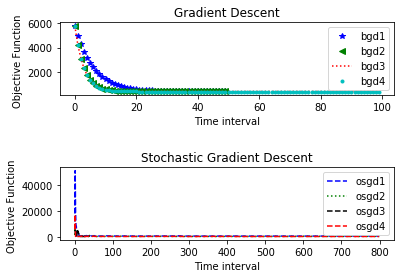

In [235]:
import random
import numpy as np
import matplotlib.pyplot as plt




if __name__ == '__main__':
    # Put the code for the plots here, you can use different functions for each
    # part
    

    
    data = np.load('data.npy')
    x, y = np.split(data, 2, 1)

    
    x_dim =  get_width(x)
    y_cat = get_width(y)
    num_samples = x.shape[0]
    w = np.random.rand(x.shape[1],y.shape[1])
    x = x.tolist()
    for count,i in enumerate(x):
        i.append(1)     #appending 1 to the input data
    
    x=np.array(x)  
   
    
    
   
    gd1, ogd1 = bgd_l2(x, y, w, 0.05, 0.10, 0.001, 50)
    
    gd2, ogd2 = bgd_l2(x, y, w, 0.10, 0.01, 0.001, 50)
    
    gd3, ogd3 = bgd_l2(x, y, w, 0.10, 0.00, 0.001, 100)
    
    gd4, ogd4 = bgd_l2(x, y, w, 0.10, 0.00, 0.000, 100)
    
    plt.clf()
    
    plt.subplots_adjust(hspace=1)
    
    plt.figure(1)
    
    plt.subplot(211)
    
    plt.title("Gradient Descent")
    
    plt.plot(ogd1, 'b*')
    
    plt.plot(ogd2, 'g<')
    
    plt.plot(ogd3, 'r:')
    
    plt.plot(ogd4, 'c.')
    
    plt.legend(['bgd1', 'bgd2', 'bgd3', 'bgd4'])
    
    plt.xlabel("Time interval")
    
    plt.ylabel("Objective Function ")
    
    sgd1, osgd1 = sgd_l2(x, y, w, 1, 0.10, 0.05, 800)
    
    sgd2, osgd2 = sgd_l2(x, y, w, 1, 0.01, 0.01, 800)
    
    sgd3, osgd3 = sgd_l2(x, y, w, 1, 0.00, 0.00, 40)
    
    sgd4, osgd4 = sgd_l2(x, y, w, 1, 0.00, 0.00, 800)

    
    plt.subplot(212)
    plt.title("Stochastic Gradient Descent")
    
    plt.plot(osgd1, 'b--')
    
    plt.plot(osgd2, 'g:')
    
    plt.plot(osgd3, 'k--')
    
    plt.plot(osgd4, 'r--')
    
    plt.legend(['osgd1', 'osgd2', 'osgd3', 'osgd4'])
    
    plt.xlabel("Time interval")
    plt.ylabel("Objective Function ")
    
    
    plt.show()
    
    
    